# Загрузка модулей и библиотек

In [ ]:
!pip install statsmodels
!pip install scipy
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.signal import welch
#from scipy.signal.windows import hanning
from scipy.signal.windows import blackman

#from pmdarima.arima.utils import ndiffs
import matplotlib.dates as mdates
#from matplotlib.ticker import MaxNLocator, AutoMinorLocator
from matplotlib.dates import HourLocator, MinuteLocator
from matplotlib.ticker import AutoMinorLocator

# Загрузка исходных данных

In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving 14_2024-03-05_2024-09-05.xlsx to 14_2024-03-05_2024-09-05.xlsx


Saving 14_2024-09-05_2025-03-05.xlsx to 14_2024-09-05_2025-03-05.xlsx


In [ ]:
# Читаем данные из первого листа файла Excel
df_1 = pd.read_excel('/content/14_2024-03-05_2024-09-05.xlsx', engine='openpyxl')
df_2 = pd.read_excel('/content/14_2024-09-05_2025-03-05.xlsx', engine='openpyxl')

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685201 entries, 0 to 685200
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   layer           685201 non-null  int64         
 1   archive_itemid  685201 non-null  int64         
 2   source_time     685201 non-null  datetime64[ns]
 3   value           685201 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 20.9 MB


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686976 entries, 0 to 686975
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   layer           686976 non-null  int64         
 1   archive_itemid  686976 non-null  int64         
 2   source_time     686976 non-null  datetime64[ns]
 3   value           686976 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 21.0 MB


In [ ]:
# Объединение двух датафреймов
df = pd.concat([df_1, df_2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372177 entries, 0 to 1372176
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   layer           1372177 non-null  int64         
 1   archive_itemid  1372177 non-null  int64         
 2   source_time     1372177 non-null  datetime64[ns]
 3   value           1372177 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 41.9 MB


In [ ]:
# Читаем данные из первого листа файла Excel
#df = pd.read_excel('/content/14_2024-03-05_2024-09-05.xlsx', engine='openpyxl')

# Проверяем, существует ли колонка source_time
if 'source_time' in df.columns:
    # Преобразовываем source_time в объект datetime
    df['source_time'] = pd.to_datetime(df['source_time'])

    # Разделяем source_time на дату и время
    df['date'] = df['source_time'].dt.date
    df['time'] = df['source_time'].dt.time

    # Преобразуем time, чтобы отбросить секунды
    df['time'] = df['time'].apply(lambda t: t.replace(second=0))

# Показываем первые пять строк для проверки
print(df.head())

   layer  archive_itemid         source_time  value        date      time
0      1              14 2024-03-05 12:04:31    332  2024-03-05  12:04:00
1      1              14 2024-03-05 12:04:59    335  2024-03-05  12:04:00
2      1              14 2024-03-05 12:05:00    334  2024-03-05  12:05:00
3      1              14 2024-03-05 12:05:05    340  2024-03-05  12:05:00
4      1              14 2024-03-05 12:05:59    294  2024-03-05  12:05:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372177 entries, 0 to 1372176
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   layer           1372177 non-null  int64         
 1   archive_itemid  1372177 non-null  int64         
 2   source_time     1372177 non-null  datetime64[ns]
 3   value           1372177 non-null  int64         
 4   date            1372177 non-null  object        
 5   time            1372177 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 62.8+ MB


In [ ]:
# Группируем данные по дате и времени (минуты), выбираем строку с минимальной секундой
df_grouped = df.sort_values(by=['source_time']) \
               .groupby(['date', 'time'], as_index=False) \
               .first()

# Показываем результат
print(df_grouped.head())
print(len(df_grouped))
df_grouped.info()

         date      time  layer  archive_itemid         source_time  value
0  2024-03-05  12:04:00      1              14 2024-03-05 12:04:31    332
1  2024-03-05  12:05:00      1              14 2024-03-05 12:05:00    334
2  2024-03-05  12:06:00      1              14 2024-03-05 12:06:00    295
3  2024-03-05  12:07:00      1              14 2024-03-05 12:07:00    160
4  2024-03-05  12:08:00      1              14 2024-03-05 12:08:00    167
427440
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427440 entries, 0 to 427439
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            427440 non-null  object        
 1   time            427440 non-null  object        
 2   layer           427440 non-null  int64         
 3   archive_itemid  427440 non-null  int64         
 4   source_time     427440 non-null  datetime64[ns]
 5   value           427440 non-null  int64         
dtypes: datetim

In [ ]:
# Определяем минимальную и максимальную даты
min_date = df_grouped['date'].min()
max_date = df_grouped['date'].max()

# Генерируем все возможные даты между min_date и max_date
dates = pd.date_range(min_date, max_date, freq='D')

# Генерируем все возможные минуты в течение дня
minutes = pd.date_range('00:00', '23:59', freq='min').time

# Создаем DataFrame с полными датами и минутами
df_base = pd.DataFrame({
    'date': np.repeat(dates, len(minutes)),
    'time': np.tile(minutes, len(dates))
})

# Преобразуем time в формат HH:MM
df_base['time'] = df_base['time'].astype(str).str.slice(0, 5)

df_base.info()
print(len(df_base))
print(min_date)
print(max_date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527040 entries, 0 to 527039
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    527040 non-null  datetime64[ns]
 1   time    527040 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 8.0+ MB
527040
2024-03-05
2025-03-05


In [ ]:
# Преобразуем столбец 'date' в df_base в формат datetime64[ns]
df_base['date'] = pd.to_datetime(df_base['date'])

# Преобразуем столбец 'date' в df_grouped в формат datetime64[ns]
df_grouped['date'] = pd.to_datetime(df_grouped['date'])

# Приводим столбец 'time' в df_base к формату 'HH:MM'
df_base['time'] = df_base['time'].str.slice(0, 5)

# Приводим столбец 'time' в df_grouped к формату 'HH:MM'
df_grouped['time'] = df_grouped['time'].astype(str).str.slice(0, 5)

# Объединяем df_base с df_grouped по дате и времени
result_df = df_base.merge(df_grouped, how='left', on=['date', 'time'])

# Заполняем пропущенные значения value, перенося последние известные значения вперед
#result_df['value'] = result_df['value'].fillna(method='ffill')

# Линейная интерполяция для заполнения пропущенных значений value
result_df['value'] = result_df['value'].interpolate()

# Показываем результат
print(result_df.head())
result_df.info()
print(len(result_df))

        date   time  layer  archive_itemid source_time  value
0 2024-03-05  00:00    NaN             NaN         NaT    NaN
1 2024-03-05  00:01    NaN             NaN         NaT    NaN
2 2024-03-05  00:02    NaN             NaN         NaT    NaN
3 2024-03-05  00:03    NaN             NaN         NaT    NaN
4 2024-03-05  00:04    NaN             NaN         NaT    NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527040 entries, 0 to 527039
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            527040 non-null  datetime64[ns]
 1   time            527040 non-null  object        
 2   layer           427440 non-null  float64       
 3   archive_itemid  427440 non-null  float64       
 4   source_time     427440 non-null  datetime64[ns]
 5   value           526316 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 24.1+ MB
527040


In [ ]:
#  Удаляем NaN
result_df_no_na = result_df.dropna(subset=['value'])
# Показываем результат
print(result_df_no_na.head())
result_df_no_na.info()
print(len(result_df_no_na))

          date   time  layer  archive_itemid         source_time  value
724 2024-03-05  12:04    1.0            14.0 2024-03-05 12:04:31  332.0
725 2024-03-05  12:05    1.0            14.0 2024-03-05 12:05:00  334.0
726 2024-03-05  12:06    1.0            14.0 2024-03-05 12:06:00  295.0
727 2024-03-05  12:07    1.0            14.0 2024-03-05 12:07:00  160.0
728 2024-03-05  12:08    1.0            14.0 2024-03-05 12:08:00  167.0
<class 'pandas.core.frame.DataFrame'>
Index: 526316 entries, 724 to 527039
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            526316 non-null  datetime64[ns]
 1   time            526316 non-null  object        
 2   layer           427440 non-null  float64       
 3   archive_itemid  427440 non-null  float64       
 4   source_time     427440 non-null  datetime64[ns]
 5   value           526316 non-null  float64       
dtypes: datetime64[ns](2), float64(3)

# Аннотирование временного ряда

In [ ]:
# В копию df добавляем колонку 'mode' - режим работы

df_mode = result_df_no_na.copy()
df_mode['mode'] = 0

#df_mode.info()
#print(len(df_mode))
print(f"{len(df_mode):,.0f}")

526,316


**Фильтр по заданному дню**

In [ ]:
# Фильтруем данные за 2024-06-25
df_one_day = df_mode.loc[df_mode['date'] == '2024-06-25']

# Переиндексация датафрейма
df_one_day_reset = df_one_day.reset_index(drop=True)
# Вывод индекса первого элемента
print(f"Индекс первого элемента: {df_one_day_reset.index[0]}")

# Вывод индекса последнего элемента
print(f"Индекс последнего элемента: {df_one_day_reset.index[-1]}")


print(f"{len(df_one_day):,.0f}")
df_one_day.info()

Индекс первого элемента: 0
Индекс последнего элемента: 1439
1,440
<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 161280 to 162719
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1440 non-null   datetime64[ns]
 1   time            1440 non-null   object        
 2   layer           1018 non-null   float64       
 3   archive_itemid  1018 non-null   float64       
 4   source_time     1018 non-null   datetime64[ns]
 5   value           1440 non-null   float64       
 6   mode            1440 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 90.0+ KB


**Фильтр по заданному интервалу дней**

In [ ]:
def filter_dataframe_by_date_range(df, start_day, end_day):
  """
  Фильтрует DataFrame по диапазону дат от start_day до end_day включительно.

  Args:
    df (pd.DataFrame): Исходный DataFrame с колонкой 'date' в формате datetime или строковом формате,
                      приводимом к datetime.
    start_day (str): Начальная дата периода в формате 'YYYY-MM-DD'.
    end_day (str): Конечная дата периода в формате 'YYYY-MM-DD'.

  Returns:
    pd.DataFrame: Отфильтрованный DataFrame, переиндексированный.  Возвращает пустой DataFrame, если исходный DataFrame пуст,
                  если start_day или end_day не в нужном формате, или если start_day > end_day.
  """

  if df.empty:
    return pd.DataFrame()

  try:
    start_date = pd.to_datetime(start_day)
    end_date = pd.to_datetime(end_day)
  except ValueError:
    print("Ошибка: Неправильный формат даты. Используйте формат YYYY-MM-DD.")
    return pd.DataFrame()

  if start_date > end_date:
    print("Ошибка: Начальная дата должна быть раньше или равна конечной дате.")
    return pd.DataFrame()

  # Убеждаемся, что колонка 'date' имеет тип datetime.  Если нет, пытаемся преобразовать.
  if not pd.api.types.is_datetime64_any_dtype(df['date']):
    try:
      df['date'] = pd.to_datetime(df['date'])
    except ValueError:
      print("Ошибка: Колонка 'date' не может быть преобразована в формат datetime.")
      return pd.DataFrame()
    except KeyError:
      print("Ошибка: В DataFrame отсутствует колонка 'date'.")
      return pd.DataFrame()

  # Фильтруем DataFrame по диапазону дат.
  filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

  # Переиндексируем DataFrame.
  filtered_df_reset = filtered_df.reset_index(drop=True)

  return filtered_df_reset



start_day = '2024-07-01'
end_day = '2024-07-31'

# Важно использовать copy(), чтобы не изменять исходный DataFrame
df_interval = filter_dataframe_by_date_range(df_mode.copy(), start_day, end_day)

if not df_interval.empty:
  print(df_interval)
  print(f"Индекс первого элемента: {df_interval.index[0]}")
else:
  print("DataFrame после фильтрации пуст.")


print(f"Число значений в интервале: {len(df_interval):,.0f}")
df_interval.info()

            date   time  layer  archive_itemid         source_time  \
0     2024-07-01  00:00    NaN             NaN                 NaT   
1     2024-07-01  00:01    NaN             NaN                 NaT   
2     2024-07-01  00:02    NaN             NaN                 NaT   
3     2024-07-01  00:03    NaN             NaN                 NaT   
4     2024-07-01  00:04    NaN             NaN                 NaT   
...          ...    ...    ...             ...                 ...   
44635 2024-07-31  23:55    1.0            14.0 2024-07-31 23:55:00   
44636 2024-07-31  23:56    1.0            14.0 2024-07-31 23:56:00   
44637 2024-07-31  23:57    1.0            14.0 2024-07-31 23:57:00   
44638 2024-07-31  23:58    1.0            14.0 2024-07-31 23:58:00   
44639 2024-07-31  23:59    1.0            14.0 2024-07-31 23:59:00   

            value  mode  
0      187.384615     0  
1      185.769231     0  
2      184.153846     0  
3      182.538462     0  
4      180.923077     0  
...

**Функция задания mode=1**

In [ ]:
import pandas as pd

def set_mode(df, level, period_in_minutes):
    """
    Устанавливает значение 'mode' в датафрейме на основе порогового значения 'level' и периода 'period'.

    :param df: Датафрейм
    :param level: Пороговое значение для колонки 'value'
    :param period_in_minutes: Период в минутах для определения диапазона времени
    :return: Датафрейм с установленным значением 'mode'
    """
    # Преобразуем период в объект TimeDelta
    period = pd.Timedelta(minutes=period_in_minutes)

    # Создаем копию датафрейма, чтобы не изменять исходный
    df_copy = df.copy()

    # Переиндексируем датафрейм для обеспечения последовательных индексов
    df_copy = df_copy.reset_index(drop=True)

    condition_met = False  # Флаг для отслеживания выполнения условия
    start_time = None  # Переменная для хранения времени начала аннотирования

    # Проходим по строкам датафрейма
    for i, row in df_copy.iterrows():
        value = row['value']
        source_time = row['source_time']

        if value > level:
            # Определяем начало и конец временного интервала
            start_time = source_time
            end_time = start_time + period

            # Фильтруем строки в пределах временного интервала
            mask = (df_copy['source_time'] >= start_time) & (df_copy['source_time'] <= end_time)
            selected_rows = df_copy[mask]

            # Вычисляем среднее арифметическое значение 'value' в интервале
            mean_value = selected_rows['value'].mean()
            #print(f"Среднее арифметическое значение 'value' в интервале: {mean_value}")

            if mean_value > level:
                # Находим индекс строки, соответствующей start_time
                index_start_time = df_copy.index[df_copy['source_time'] == start_time][0]
                #print('index_start_time:', index_start_time)
                #print('len(df_copy):', len(df_copy))
                for j in range(index_start_time, len(df_copy)):
                    #if df_copy.loc[j, 'value'] != 0:
                    if df_copy.loc[j, 'value'] > 5:
                        df_copy.loc[j, 'mode'] = 1
                    else:
                        break  # Прерываем цикл, если нашли строку с value = 0
                #print(f"mode=1 установлено для строк начиная с {start_time} до первой строки, где value = 0")
                condition_met = True  # Условие выполнено
                #break

    # Если ни одно значение не подходит, возвращаем исходный датафрейм
    if not condition_met:
        print("mode=0 не был изменён, условие mean_value > level не было выполнено.")
    else:
        print(f"Количество строк с mode=0: {(df_copy['mode'] == 0).sum()}")
        print(f"Количество строк с mode=1: {(df_copy['mode'] == 1).sum()}")

    return df_copy

In [ ]:
level = 180
period_in_minutes = 10

# Устанавливаем mode для датасета "df_one_day"
annotated_df = set_mode(df_one_day, level, period_in_minutes)


# Устанавливаем mode для датасета "df_interval"
#annotated_df = set_mode(df_interval, level, period_in_minutes)

#annotated_df = set_mode(df_mode, level, period_in_minutes)

Количество строк с mode=0: 197
Количество строк с mode=1: 1243


**График временного ряда за весь период**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_value_by_source_time(df):
    """
    Рисует график значений 'value' по времени 'source_time' с использованием цветов для обозначения 'mode'.

    :param df: Датафрейм с данными
    """
    # Создаем фигуру и оси для графика
    fig, ax = plt.subplots(figsize=(12, 6))

    # Удаляем строки с NaT значениями в source_time
    df = df.dropna(subset=['source_time'])

    # Формируем маски для разделения данных по значению 'mode'
    mask_mode_0 = df['mode'] == 0
    mask_mode_1 = df['mode'] == 1

    # Рисуем точки для mode=0 красным цветом
    ax.scatter(
        x=df.loc[mask_mode_0, 'source_time'],
        y=df.loc[mask_mode_0, 'value'],
        marker='.',  # Вид маркеров (точек)
        s=2,  # Размер точек
        #color='red',  # Цвет точек
        color='lightcoral',  # Светло-красный цвет точек
        label='Mode = 0'  # Легенда
    )

    # Рисуем точки для mode=1 зеленым цветом
    ax.scatter(
        x=df.loc[mask_mode_1, 'source_time'],
        y=df.loc[mask_mode_1, 'value'],
        marker='.',  # Вид маркеров (точек)
        s=2,  # Размер точек
        #color='green',  # Цвет точек
        color='lightgreen',
        label='Mode = 1'  # Легенда
    )

    # Рисуем линии между точками
    #colors = {'0': 'red', '1': 'green'}  # Соответствие между mode и цветом линии
    #transition_color = 'yellow'  # Цвет для линий переходов

    colors = {'0': 'lightcoral', '1': 'lightgreen'}  # Соответствие между mode и цветом линии
    transition_color = 'orange'  # Оранжевый цвет для линий переходов


    # Цикл для рисования линий
    for i in range(1, len(df)):
        prev_mode = str(df.iloc[i-1]['mode'])
        curr_mode = str(df.iloc[i]['mode'])

        # Определяем цвет линии
        if prev_mode == curr_mode:
            line_color = colors[prev_mode]
        else:
            line_color = transition_color

        # Рисуем линию между точками
        ax.plot(
            [df.iloc[i-1]['source_time'], df.iloc[i]['source_time']],
            [df.iloc[i-1]['value'], df.iloc[i]['value']],
            marker='',  # Без маркеров
            linestyle='-',  # Линия между точками
            linewidth=1,  # Толщина линии
            color=line_color,  # Цвет линии
            label=f'Mode Transition ({prev_mode} -> {curr_mode})' if prev_mode != curr_mode else ''
        )

    # Настройки графика
    ax.set_xlabel('Время (source_time)')
    ax.set_ylabel('Значение (value)')
    #ax.legend()
    ax.grid(True)

    # Показ графика
    plt.show()




# Пример использования функции
#plot_value_by_source_time(annotated_df)

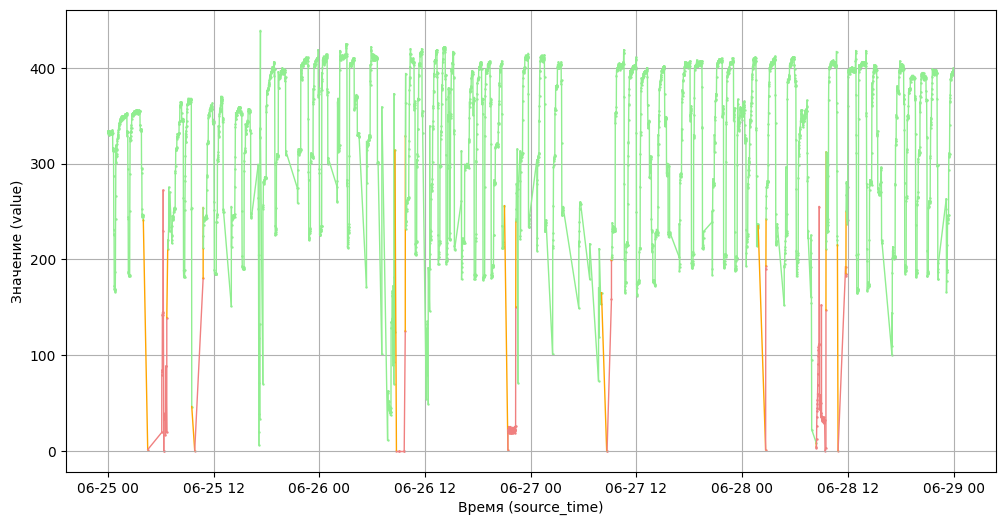

In [ ]:
# Пример использования функции
plot_value_by_source_time(annotated_df)

**График временного ряда с заданием диапазона даты и времени**

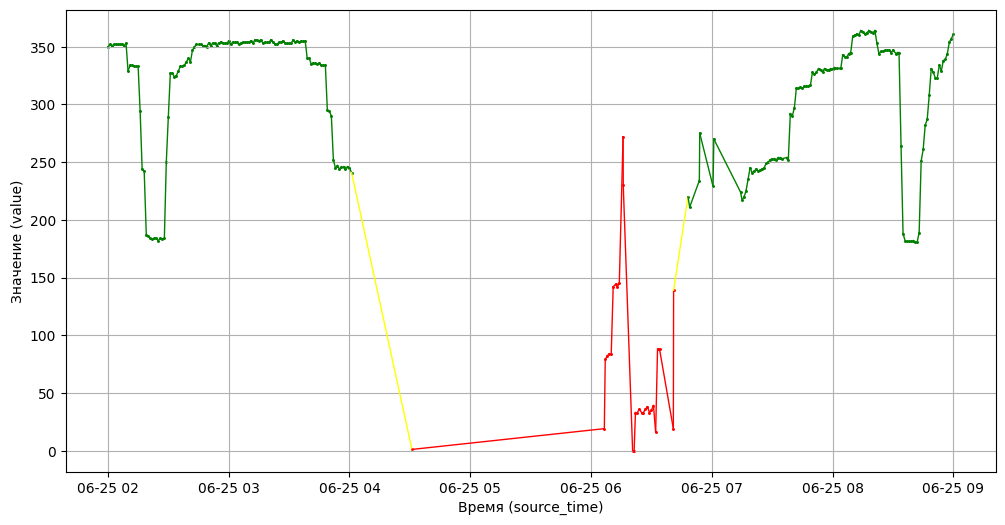

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_value_by_source_time(df, start_time_range=None, end_time_range=None):
    """
    Рисует график значений 'value' по времени 'source_time' с использованием цветов для обозначения 'mode'.

    :param df: Датафрейм с данными
    :param start_time_range: Начальное время для ограничения диапазона (optional)
    :param end_time_range: Конечное время для ограничения диапазона (optional)
    """
    # Создаем фигуру и оси для графика
    fig, ax = plt.subplots(figsize=(12, 6))

    # Преобразуем столбец 'source_time' в формат datetime
    df['source_time'] = pd.to_datetime(df['source_time'])

    # Применяем фильтры по времени, если указаны
    if start_time_range is not None:
        df = df[df['source_time'] >= start_time_range]
    if end_time_range is not None:
        df = df[df['source_time'] <= end_time_range]

    # Удаляем строки с NaT значениями в source_time
    df = df.dropna(subset=['source_time'])

    # Формируем маски для разделения данных по значению 'mode'
    mask_mode_0 = df['mode'] == 0
    mask_mode_1 = df['mode'] == 1

    # Рисуем точки для mode=0 красным цветом
    ax.scatter(
        x=df.loc[mask_mode_0, 'source_time'],
        y=df.loc[mask_mode_0, 'value'],
        marker='.',  # Вид маркеров (точек)
        s=5,  # Размер точек
        color='red',  # Цвет точек
        label='Mode = 0'  # Легенда
    )

    # Рисуем точки для mode=1 зеленым цветом
    ax.scatter(
        x=df.loc[mask_mode_1, 'source_time'],
        y=df.loc[mask_mode_1, 'value'],
        marker='.',  # Вид маркеров (точек)
        s=5,  # Размер точек
        color='green',  # Цвет точек
        label='Mode = 1'  # Легенда
    )

    # Рисуем линии между точками
    colors = {'0': 'red', '1': 'green'}  # Соответствие между mode и цветом линии
    transition_color = 'yellow'  # Цвет для линий переходов

    # Цикл для рисования линий
    for i in range(1, len(df)):
        prev_mode = str(df.iloc[i-1]['mode'])
        curr_mode = str(df.iloc[i]['mode'])

        # Определяем цвет линии
        if prev_mode == curr_mode:
            line_color = colors[prev_mode]
        else:
            line_color = transition_color

        # Рисуем линию между точками
        ax.plot(
            [df.iloc[i-1]['source_time'], df.iloc[i]['source_time']],
            [df.iloc[i-1]['value'], df.iloc[i]['value']],
            marker='',  # Без маркеров
            linestyle='-',  # Линия между точками
            linewidth=1,  # Толщина линии
            color=line_color,  # Цвет линии
            label=f'Mode Transition ({prev_mode} -> {curr_mode})' if prev_mode != curr_mode else ''
        )

    # Настройки графика
    ax.set_xlabel('Время (source_time)')
    ax.set_ylabel('Значение (value)')
    #ax.legend()
    ax.grid(True)

    # Показ графика
    plt.show()

# Пример использования функции
plot_value_by_source_time(annotated_df, start_time_range='2024-06-25 02:00', end_time_range='2024-06-25 09:00')

# Сохранение данных

**Сохранение датафрейма**

In [ ]:
import os
import pandas as pd

def save_dataframe_to_file(df, file_path, file_name):
    """ Сохраняет датафрейм в файл CSV с заданным путем и названием. :param df: Датафрейм для сохранения :param file_path: Путь к директории для сохранения файла :param file_name: Имя файла для сохранения """
    # Создаём каталог, если он не существует
    os.makedirs(file_path, exist_ok=True)

    full_path = f"{file_path}/{file_name}.csv"
    df.to_csv(full_path, index=False)
    print(f"Датафрейм сохранен в файл: {full_path}")


def load_and_merge_dataframes(file_path, file_names):
    """ Загружает и объединяет несколько датафреймов из файлов CSV. :param file_path: Путь к директории, где хранятся файлы :param file_names: Список имен файлов для загрузки :return: Объединенный датафрейм """
    dfs = []  # Список для хранения загруженных датафреймов
    for file_name in file_names:
        full_path = f"{file_path}/{file_name}.csv"
        df = pd.read_csv(full_path)
        dfs.append(df)

    # Объединение датафреймов по вертикали (stacking)
    merged_df = pd.concat(dfs, ignore_index=True)

    return merged_df

In [ ]:
# Пример сохранения датафрейма
file_path = r"C:\Users\Андрей\Documents\Курсы\AI_ML_разработчик\Стажировка_1\Задача_1\Данные от заказчика\рабочий каталог"
save_dataframe_to_file(annotated_df, file_path, "annotated_df_07_2024")


Датафрейм сохранен в файл: C:\Users\Андрей\Documents\Курсы\AI_ML_разработчик\Стажировка_1\Задача_1\Данные от заказчика\рабочий каталог/annotated_df_07_2024.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving annotated_df_06_2024.csv to annotated_df_06_2024.csv


In [ ]:
if uploaded:  # Проверяем, что хотя бы один файл был загружен
  filename = next(iter(uploaded)) # Получаем имя первого загруженного файла

  try:
    df_06_2024 = pd.read_csv(filename)
    print(df_06_2024.head())
  except FileNotFoundError:
    print(f"Ошибка: Файл '{filename}' не найден.")
  except Exception as e:
    print(f"Произошла ошибка: {e}")
else:
  print("Файл не был загружен.")

         date   time  layer  archive_itemid source_time       value  mode
0  2024-06-01  00:00    NaN             NaN         NaN  120.000000     0
1  2024-06-01  00:01    NaN             NaN         NaN  111.571429     0
2  2024-06-01  00:02    NaN             NaN         NaN  103.142857     0
3  2024-06-01  00:03    NaN             NaN         NaN   94.714286     0
4  2024-06-01  00:04    NaN             NaN         NaN   86.285714     0


**Формирование и сохранение сводного датафрейма**

In [ ]:
from google.colab import files
import io

# Создаем пустой список для хранения датафреймов из каждого файла
dfs = []

# Загружаем файлы в цикле
for i in range(1, 14):  # Исправлено: цикл до 14, чтобы прочитать 13 файлов (1-13)
    print(f"Загрузите файл {i} из 13...") # Подсказка пользователю, какой файл нужно загрузить

    uploaded = files.upload()

    # Проверяем, что файл был загружен
    if len(uploaded) > 0:
        # Получаем имя файла (ключ в словаре uploaded)
        filename = list(uploaded.keys())[0]

        # Читаем CSV файл в DataFrame
        try:
            df = pd.read_csv(io.BytesIO(uploaded[filename])) # Используем io.BytesIO для чтения из памяти
            dfs.append(df) # Добавляем DataFrame в список
            print(f"Файл {filename} успешно загружен и обработан.")
        except Exception as e:
            print(f"Ошибка при чтении файла {filename}: {e}")
    else:
        print("Файл не был загружен. Проверьте загрузку.")

# Объединяем все DataFrame в один
if dfs: # Проверяем, что список dfs не пустой
    df_consolidated = pd.concat(dfs, ignore_index=True) # Объединяем DataFrame
    print("Все файлы успешно объединены в df_consolidated.")
else:
    print("Не было загружено ни одного файла. df_consolidated не создан.")

# Теперь df_consolidated содержит все данные из всех CSV файлов

# (Опционально) Вывод первых нескольких строк объединенного DataFrame
if 'df_consolidated' in locals(): # Проверяем, что переменная существует
    print(df_consolidated.head())

Загрузите файл 1 из 13...


Saving annotated_df_01_2025.csv to annotated_df_01_2025 (1).csv
Файл annotated_df_01_2025 (1).csv успешно загружен и обработан.
Загрузите файл 2 из 13...


Saving annotated_df_02_2025.csv to annotated_df_02_2025 (1).csv
Файл annotated_df_02_2025 (1).csv успешно загружен и обработан.
Загрузите файл 3 из 13...


Saving annotated_df_03_2024.csv to annotated_df_03_2024 (1).csv
Файл annotated_df_03_2024 (1).csv успешно загружен и обработан.
Загрузите файл 4 из 13...


Saving annotated_df_03_2025.csv to annotated_df_03_2025 (1).csv
Файл annotated_df_03_2025 (1).csv успешно загружен и обработан.
Загрузите файл 5 из 13...


Saving annotated_df_04_2024.csv to annotated_df_04_2024 (1).csv
Файл annotated_df_04_2024 (1).csv успешно загружен и обработан.
Загрузите файл 6 из 13...


Saving annotated_df_05_2024.csv to annotated_df_05_2024 (1).csv
Файл annotated_df_05_2024 (1).csv успешно загружен и обработан.
Загрузите файл 7 из 13...


Saving annotated_df_06_2024.csv to annotated_df_06_2024 (1).csv
Файл annotated_df_06_2024 (1).csv успешно загружен и обработан.
Загрузите файл 8 из 13...


Saving annotated_df_07_2024.csv to annotated_df_07_2024 (1).csv
Файл annotated_df_07_2024 (1).csv успешно загружен и обработан.
Загрузите файл 9 из 13...


Saving annotated_df_08_2024.csv to annotated_df_08_2024 (1).csv
Файл annotated_df_08_2024 (1).csv успешно загружен и обработан.
Загрузите файл 10 из 13...


Saving annotated_df_09_2024.csv to annotated_df_09_2024 (1).csv
Файл annotated_df_09_2024 (1).csv успешно загружен и обработан.
Загрузите файл 11 из 13...


Saving annotated_df_10_2024.csv to annotated_df_10_2024 (1).csv
Файл annotated_df_10_2024 (1).csv успешно загружен и обработан.
Загрузите файл 12 из 13...


Saving annotated_df_11_2024.csv to annotated_df_11_2024 (1).csv
Файл annotated_df_11_2024 (1).csv успешно загружен и обработан.
Загрузите файл 13 из 13...


Saving annotated_df_12_2024.csv to annotated_df_12_2024.csv
Файл annotated_df_12_2024.csv успешно загружен и обработан.
Все файлы успешно объединены в df_consolidated.
         date   time  layer  archive_itemid source_time  value  mode
0  2025-01-01  00:00    NaN             NaN         NaN    0.0     0
1  2025-01-01  00:01    NaN             NaN         NaN    0.0     0
2  2025-01-01  00:02    NaN             NaN         NaN    0.0     0
3  2025-01-01  00:03    NaN             NaN         NaN    0.0     0
4  2025-01-01  00:04    NaN             NaN         NaN    0.0     0


In [ ]:
from google.colab import files
import io

# Создаем пустой список для хранения датафреймов из каждого файла
dfs = []

# Загружаем файлы в цикле
for i in range(1, 14):  # Исправлено: цикл до 14, чтобы прочитать 13 файлов (1-13)
    print(f"Загрузите файл {i} из 13...") # Подсказка пользователю, какой файл нужно загрузить

    uploaded = files.upload()

    # Проверяем, что файл был загружен
    if len(uploaded) > 0:
        # Получаем имя файла (ключ в словаре uploaded)
        filename = list(uploaded.keys())[0]

        # Читаем CSV файл в DataFrame
        try:
            df = pd.read_csv(io.BytesIO(uploaded[filename])) # Используем io.BytesIO для чтения из памяти

            # Преобразуем 'source_time' в datetime, если он еще не в этом формате
            df['source_time'] = pd.to_datetime(df['source_time'])

            # Обрезаем время до минут (формат: 'YYYY-MM-DD HH:MM')
            df['source_time'] = df['source_time'].dt.strftime('%Y-%m-%d %H:%M')

            # Удаляем дубликаты по столбцу 'source_time', оставляя первое вхождение
            df = df.drop_duplicates(subset=['source_time'], keep='first')


            dfs.append(df) # Добавляем DataFrame в список
            print(f"Файл {filename} успешно загружен и обработан.")
        except Exception as e:
            print(f"Ошибка при чтении файла {filename}: {e}")
    else:
        print("Файл не был загружен. Проверьте загрузку.")

# Объединяем все DataFrame в один
if dfs: # Проверяем, что список dfs не пустой
    df_consolidated = pd.concat(dfs, ignore_index=True) # Объединяем DataFrame
    print("Все файлы успешно объединены в df_consolidated.")
else:
    print("Не было загружено ни одного файла. df_consolidated не создан.")

# Теперь df_consolidated содержит все данные из всех CSV файлов

# (Опционально) Вывод первых нескольких строк объединенного DataFrame
if 'df_consolidated' in locals(): # Проверяем, что переменная существует
    print(df_consolidated.head())

Загрузите файл 1 из 13...


Saving annotated_df_01_2025.csv to annotated_df_01_2025.csv
Файл annotated_df_01_2025.csv успешно загружен и обработан.
Загрузите файл 2 из 13...


Saving annotated_df_02_2025.csv to annotated_df_02_2025.csv
Файл annotated_df_02_2025.csv успешно загружен и обработан.
Загрузите файл 3 из 13...


Saving annotated_df_03_2024.csv to annotated_df_03_2024.csv
Файл annotated_df_03_2024.csv успешно загружен и обработан.
Загрузите файл 4 из 13...


Saving annotated_df_03_2025.csv to annotated_df_03_2025.csv
Файл annotated_df_03_2025.csv успешно загружен и обработан.
Загрузите файл 5 из 13...


Saving annotated_df_04_2024.csv to annotated_df_04_2024.csv
Файл annotated_df_04_2024.csv успешно загружен и обработан.
Загрузите файл 6 из 13...


Saving annotated_df_05_2024.csv to annotated_df_05_2024.csv
Файл annotated_df_05_2024.csv успешно загружен и обработан.
Загрузите файл 7 из 13...


Saving annotated_df_06_2024.csv to annotated_df_06_2024.csv
Файл annotated_df_06_2024.csv успешно загружен и обработан.
Загрузите файл 8 из 13...


Saving annotated_df_07_2024.csv to annotated_df_07_2024.csv
Файл annotated_df_07_2024.csv успешно загружен и обработан.
Загрузите файл 9 из 13...


Saving annotated_df_08_2024.csv to annotated_df_08_2024.csv
Файл annotated_df_08_2024.csv успешно загружен и обработан.
Загрузите файл 10 из 13...


Saving annotated_df_09_2024.csv to annotated_df_09_2024.csv
Файл annotated_df_09_2024.csv успешно загружен и обработан.
Загрузите файл 11 из 13...


Saving annotated_df_10_2024.csv to annotated_df_10_2024.csv
Файл annotated_df_10_2024.csv успешно загружен и обработан.
Загрузите файл 12 из 13...


Saving annotated_df_11_2024.csv to annotated_df_11_2024.csv
Файл annotated_df_11_2024.csv успешно загружен и обработан.
Загрузите файл 13 из 13...


Saving annotated_df_12_2024.csv to annotated_df_12_2024.csv
Файл annotated_df_12_2024.csv успешно загружен и обработан.
Все файлы успешно объединены в df_consolidated.
         date   time  layer  archive_itemid       source_time  value  mode
0  2025-01-01  00:00    NaN             NaN               NaN    0.0     0
1  2025-01-04  05:12    1.0            14.0  2025-01-04 05:12    0.0     0
2  2025-01-04  05:14    1.0            14.0  2025-01-04 05:14    0.0     0
3  2025-01-04  05:15    1.0            14.0  2025-01-04 05:15    0.0     0
4  2025-01-04  05:17    1.0            14.0  2025-01-04 05:17    0.0     0


In [ ]:
# Сохраняем сводный датафрейм в файле df_consolidated.csv
index = False
df_consolidated.to_csv('df_consolidated.csv', encoding='utf-8', index=index)  # Используем определенную переменную

print("DataFrame успешно сохранен в файл: df_consolidated.csv")

DataFrame успешно сохранен в файл: df_consolidated.csv


**Преобразуем сводный датафрейм**

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

# Проверяем, что файл был загружен
if len(uploaded) > 0:
    # Получаем имя файла (ключ в словаре uploaded)
    filename = list(uploaded.keys())[0]

    # Читаем CSV файл в DataFrame
    try:
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    except Exception as e:
        print(f"Ошибка при чтении файла {filename}: {e}")
else:
    print("Файл не был загружен. Проверьте загрузку.")

print(df.head())

Saving df_consolidated.csv to df_consolidated.csv
         date   time  layer  archive_itemid       source_time  value  mode
0  2025-01-01  00:00    NaN             NaN               NaN    0.0     0
1  2025-01-04  05:12    1.0            14.0  2025-01-04 05:12    0.0     0
2  2025-01-04  05:14    1.0            14.0  2025-01-04 05:14    0.0     0
3  2025-01-04  05:15    1.0            14.0  2025-01-04 05:15    0.0     0
4  2025-01-04  05:17    1.0            14.0  2025-01-04 05:17    0.0     0


In [ ]:
# Проводим обработку данных в датафрейме
def process_dataframe(df):


    # 1. Переименование колонки 'value' в 'value_14'
    df = df.rename(columns={'value': 'value_14'})

    # 2. Заполнение пропусков в 'source_time' данными из 'date' и 'time'
    #  Преобразуем дату и время с учетом минут.

    if 'date' in df.columns and 'time' in df.columns:
        # Объединяем 'date' и 'time' в колонку 'datetime_str'
        df['datetime_str'] = df['date'] + ' ' + df['time']

        # Преобразуем 'datetime_str' в datetime объекты
        try:
            df['datetime'] = pd.to_datetime(df['datetime_str'], format='%Y-%m-%d %H:%M')  # Предполагаем формат YYYY-MM-DD HH:MM:SS
            #Если формат другой, нужно заменить
        except ValueError:
            print("Ошибка: Неверный формат даты и времени в колонках 'date' и 'time'.  Пожалуйста, укажите правильный формат.")
            return df # Возвращаем DataFrame без изменений

        # Обрезаем секунды, оставляем только минуты
        df['datetime'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M') # format = '%Y-%m-%d %H:%M'

        # Заполняем пропуски в 'source_time' полученными значениями
        df['source_time'] = df['source_time'].fillna(df['datetime'])

        # Удаляем временные колонки
        df = df.drop(columns=['datetime_str', 'datetime'], errors='ignore')

    else:
        print("Предупреждение: Колонки 'date' и/или 'time' отсутствуют в DataFrame.")

    # 3. Удаление колонок 'layer' и 'archive_itemid'
    columns_to_drop = ['layer', 'archive_itemid']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')  #errors='ignore' чтобы не было ошибки, если колонки нет

    # 4. Сортировка колонки по возрастанию значений 'source_time'
    df = df.sort_values(by='source_time', ascending=True)

    return df

df = process_dataframe(df)

df.head()

,date,time,source_time,value_14,mode
77285,2024-03-05,12:04,2024-03-05 12:04,332.0,1
77286,2024-03-05,12:05,2024-03-05 12:05,334.0,1
77287,2024-03-05,12:06,2024-03-05 12:06,295.0,1
77288,2024-03-05,12:07,2024-03-05 12:07,160.0,1
77289,2024-03-05,12:08,2024-03-05 12:08,167.0,1


In [ ]:
# Сохраняем сводный датафрейм в файле df_consolidated.csv

index = False
df.to_csv('df_consolidated_1.csv', encoding='utf-8', index=index)  # Используем определенную переменную

print("DataFrame успешно сохранен в файл: df_consolidated_1.csv")

DataFrame успешно сохранен в файл: df_consolidated_1.csv


# Статистический анализ на рабочем режиме

In [ ]:
from google.colab import files
import io

uploaded = files.upload()

# Проверяем, что файл был загружен
if len(uploaded) > 0:
    # Получаем имя файла (ключ в словаре uploaded)
    filename = list(uploaded.keys())[0]

    # Читаем CSV файл в DataFrame
    try:
        df = pd.read_csv(io.BytesIO(uploaded[filename]))
    except Exception as e:
        print(f"Ошибка при чтении файла {filename}: {e}")
else:
    print("Файл не был загружен. Проверьте загрузку.")

print(df.head())

Saving df_consolidated.csv to df_consolidated.csv
         date   time       source_time  value_14  mode
0  2024-03-05  12:04  2024-03-05 12:04     332.0     1
1  2024-03-05  12:05  2024-03-05 12:05     334.0     1
2  2024-03-05  12:06  2024-03-05 12:06     295.0     1
3  2024-03-05  12:07  2024-03-05 12:07     160.0     1
4  2024-03-05  12:08  2024-03-05 12:08     167.0     1


# Функции стат. анализа

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import skew, kurtosis
from tabulate import tabulate

import matplotlib.pyplot as plt
from scipy.signal import coherence
from scipy.signal import welch
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
def calculate_hurst_exponent(time_series, max_lag=50):
    """ Рассчитывает показатель Херста с использованием R/S-анализа. :param time_series: Временной ряд :param max_lag: Максимальное значение лага для анализа :return: Показатель Херста """
    lags = range(2, max_lag)
    rs_analysis = []

    for lag in lags:
        # Создание подпоследовательности длиной lag
        subsequence = np.array([time_series[i:i+lag] for i in range(len(time_series)-lag)])

        # Расчёт средних значений для каждой подпоследовательности
        means = np.mean(subsequence, axis=1)

        # Расчёт накопленной суммы отклонений
        cumulative_deviations = np.cumsum(subsequence - means[:, np.newaxis], axis=1)

        # Расчёт диапазонов R
        ranges = np.ptp(cumulative_deviations, axis=1)

        # Расчёт стандартных отклонений S
        standard_deviations = np.std(subsequence, axis=1)

        # Игнорируем случаи, когда стандартное отклонение равно нулю
        valid_indices = standard_deviations != 0
        ranges = ranges[valid_indices]
        standard_deviations = standard_deviations[valid_indices]

        # Расчёт отношения R/S
        if len(standard_deviations) > 0:
            rs_ratio = np.mean(ranges / standard_deviations)
            rs_analysis.append((lag, rs_ratio))
        else:
            rs_analysis.append((lag, np.nan))

    # Регрессия логарифмов лагов и отношений R/S
    log_lags = np.log10([lag for lag, _ in rs_analysis])
    log_rs_ratios = np.log10([rs_ratio for _, rs_ratio in rs_analysis if not np.isnan(rs_ratio)])

    if len(log_rs_ratios) > 0:
        slope, intercept = np.polyfit(log_lags, log_rs_ratios, deg=1)
        hurst_exponent = slope * 0.5
    else:
        hurst_exponent = np.nan

    return hurst_exponent





def calculate_period_statistics(df, start_datetime, end_datetime, value_col='value'):
    """ Рассчитывает статистику для указанного периода в датафрейме. :param annotated_df: Датафрейм с колонками 'source_time', 'value' и 'mode' :param start_datetime: Начальная дата и время периода (включительно) :param end_datetime: Конечная дата и время периода (включительно) :param value_col: Название колонки с данными, для которых считается статистика :return: Красивый вывод статистики с использованием tabulate """
    # Приводим даты к нужному формату datetime
    try:
        start_datetime = pd.to_datetime(start_datetime)
        end_datetime = pd.to_datetime(end_datetime)
    except ValueError:
        raise ValueError("Неверный формат даты или времени!")

    # Фильтруем строки, где mode=1 и source_time находится в указанном диапазоне
    filtered_df = df[
        (df['source_time'] >= start_datetime) &
        (df['source_time'] <= end_datetime) &
        (df['mode'] == 1)
    ][value_col]

    # Количество точек
    count = len(filtered_df)

    # Проверка на достаточное количество данных для статистики
    if count < 2:
        print(f"ПРЕДУПРЕЖДЕНИЕ: Недостаточно данных ({count}) для расчета некоторых статистических показателей.")

    # Среднее значение
    mean = filtered_df.mean() if count > 0 else float('nan')

    # Максимальное значение
    max_value = filtered_df.max() if count > 0 else float('nan')

    # Минимальное значение
    min_value = filtered_df.min() if count > 0 else float('nan')

    # Медиана
    median = filtered_df.median() if count > 0 else float('nan')

    # Дисперсия
    variance = filtered_df.var() if count > 1 else float('nan')

    # Стандартное отклонение (СКО)
    std_dev = filtered_df.std() if count > 1 else float('nan')

    # Асимметрия
    skewness = skew(filtered_df) if count > 2 else float('nan')

    # Эксцесс
    kurt = kurtosis(filtered_df) if count > 2 else float('nan')

    # Квантили (25%, 50%, 75%)
    quantiles = filtered_df.quantile([0.25, 0.5, 0.75]) if count > 0 else {}

    # Коэффициент автокорреляции
    autocorrelation = acf(filtered_df, nlags=1)[1] if count > 1 else float('nan')

    # Проверка на стационарность (ADF-тест)
    try:
        adf_result = adfuller(filtered_df)
        stationary_p_value = adf_result[1]
    except ValueError as e:
        # Обрабатываем ситуацию, когда данные константны
        if str(e) == "Invalid input, x is constant":
            stationary_p_value = float('nan')
        else:
            stationary_p_value = float('nan')

    # Показатель Херста
    hurst_exponent = calculate_hurst_exponent(filtered_df) if count > 2 else float('nan')

    # Форматируем данные для вывода с помощью tabulate
    headers = ['Показатель', 'Значение']
    data = [
        ('Количество точек', str(count)),
        ('Среднее значение', f"{mean:.6f}"),
        ('Максимальное значение', f"{max_value:.6f}"),  # Интегрируем как float
        ('Минимальное значение', f"{min_value:.6f}"),
        ('Медиана', f"{median:.6f}"),
        ('Дисперсия', f"{variance:.6f}"),
        ('Стандартное отклонение (СКО)', f"{std_dev:.6f}"),
        ('Асимметрия', f"{skewness:.6f}"),
        ('Эксцесс', f"{kurt:.6f}"),
        ('Квантиль 25%', f"{quantiles.get(0.25, float('nan')):.6f}"),
        ('Квантиль 50% (медиана)', f"{quantiles.get(0.5, float('nan')):.6f}"),
        ('Квантиль 75%', f"{quantiles.get(0.75, float('nan')):.6f}"),
        ('Автокорреляция', f"{autocorrelation:.6f}"),
        ('p-значение ADF-теста', f"{stationary_p_value:.6f}"),
        ('Показатель Херста', f"{hurst_exponent:.6f}")
    ]

    # Добавляем строку с указанием периода в выводе
    print(f"Статистика показателя '{value_col}' \nс {start_datetime} по {end_datetime}:")
    print()

    # Используем tabulate для красивого вывода
    print(tabulate(data, headers, tablefmt="github"))
    print()

    # Возвращаем также сам DataFrame для дальнейшей работы
    statistics = pd.DataFrame({
        'Показатели': [
            'Количество точек',
            'Среднее значение',
            'Максимальное значение',
            'Минимальное значение',
            'Медиана',
            'Дисперсия',
            'Стандартное отклонение (СКО)',
            'Асимметрия',
            'Эксцесс',
            'Квантиль 25%',
            'Квантиль 50% (медиана)',
            'Квантиль 75%',
            'Автокорреляция',
            'p-значение ADF-теста',
            'Показатель Херста'
        ],
        'Значения': [
            count,
            mean,
            max_value,
            min_value,
            median,
            variance,
            std_dev,
            skewness,
            kurt,
            quantiles.get(0.25, float('nan')),
            quantiles.get(0.5, float('nan')),
            quantiles.get(0.75, float('nan')),
            autocorrelation,
            stationary_p_value,
            hurst_exponent
        ]
    })

    return statistics

In [ ]:
def plot_histogram(filtered_df, value_col='value'):
    """
    Строит гистограмму распределения для выбранной переменной.

    :param filtered_df: Подмножество датафрейма с интересующими данными
    :param value_col: Название колонки с данными, для которых строится гистограмма
    """
    plt.figure(figsize=(10, 5))  # Размер графика
    plt.hist(filtered_df[value_col], bins=100, alpha=0.7)  # Построение гистограммы
    plt.title(f"Гистограмма распределения показателя '{value_col}'")  # Заголовок графика
    plt.xlabel(value_col)  # Метка оси X
    plt.ylabel("Частота")  # Метка оси Y
    plt.grid(True)  # Сетка для удобства чтения
    plt.show()  # Отображение графика


def plot_power_spectral_density(filtered_df, value_col='value'):
    """ Строит график спектральной плотности мощности для выбранной переменной. :param filtered_df: Подмножество датафрейма с интересующими данными :param value_col: Название колонки с данными, для которых строится спектр """
    plt.figure(figsize=(10, 5))  # Размер графика
    f, Pxx_den = welch(filtered_df[value_col], fs=1.0, window='hann', nperseg=256, scaling='density')  # Построение PSD
    plt.semilogy(f, Pxx_den)  # Логарифмический масштаб по оси Y для лучшего отображения
    plt.title(f"Спектральная плотность мощности показателя '{value_col}'")  # Заголовок графика
    plt.xlabel("Частота")  # Метка оси X
    plt.ylabel("Спектральная плотность")  # Метка оси Y
    plt.grid(True)  # Сетка для удобства чтения
    plt.show()  # Отображение графика


# Функция для построения графиков ACF и PACF
def plot_acf_pacf(filtered_df):
    n = len(filtered_df[value])
    max_lags = int(np.sqrt(n))  # Подбор количества лагов согласно правилу Бартлетта

    print(f"Максимальный лаг: {max_lags}")

    plt.figure(figsize=(10, 6))
    plot_acf(filtered_df[value], lags=max_lags, title='Автокорреляционная функция (АКФ)', zero=False)
    plt.show()

    plt.figure(figsize=(10, 6))
    plot_pacf(filtered_df[value], lags=max_lags, title='Частная корреляционная функция (ЧКФ)', zero=False)
    plt.show()

In [ ]:
# Функция для построения графика спектральной плотности
def plot_spectral_density(result_df, value):

    # Выбор временного ряда для анализа
    values = result_df[value].values

    # Параметры для оценки спектральной плотности
    fs = 1  # Частота дискретизации (здесь 1, так как это временной ряд)
    nperseg = len(values) // 2  # Размер сегмента (зависит от длины ряда)
    window = blackman(nperseg)  # Применение оконной функции Blackman

    # Оцениваем спектральную плотность мощности с помощью метода Welch
    frequencies, psd = welch(values, fs=fs, nperseg=nperseg, window=window)

    # Построение графика спектральной плотности
    plt.figure(figsize=(10, 6))
    plt.semilogy(frequencies, psd, color='b')  # Логарифмическая шкала для оси Y
    plt.xlim(0, frequencies.max())  # Ограничиваем ось X
    plt.title(f'График сперктральной плотности')
    plt.xlabel('Частота [Гц]')
    plt.ylabel('Спектор мощности')
    plt.grid(True)
    plt.autoscale(enable=True, axis='both', tight=None)  # Автоматическое масштабирование осей
    plt.show()

In [ ]:
def stat_consolidated(df, value, start_datetime, end_datetime):


  # Преобразуем столбец source_time в формат datetime с указанием формата
  df['source_time'] = pd.to_datetime(df['source_time'], format="%Y-%m-%d %H:%M")

  # Преобразуем входные параметры start_datetime и end_datetime в формат datetime
  start_datetime = pd.to_datetime(start_datetime, format="%Y-%m-%d %H:%M")
  end_datetime = pd.to_datetime(end_datetime, format="%Y-%m-%d %H:%M")


  # Расчёт статистики
  calculate_period_statistics(df, start_datetime, end_datetime, value)

  # Фильтрация данных для графиков
  filtered_df = df[(df['source_time'] >= start_datetime) & (df['source_time'] <= end_datetime) & (df['mode'] == 1)]

  # Построение гистограммы
  plot_histogram(filtered_df, value)

  # Посстроение графика спектральной плотности
  plot_power_spectral_density(filtered_df, value)
  plot_spectral_density(filtered_df, value)


  # Фильтруем числовые данные
  filtered_values = filtered_df[value]


  # Строим графики ACF и PACF
  plot_acf_pacf(filtered_df)

In [ ]:
def fill_source_time(df):
  """
  Заполняет пустые значения в колонке 'source_time' DataFrame `df` значениями,
  сформированными из колонок 'date' и 'time'.

  Args:
    df (pd.DataFrame): DataFrame с колонками 'source_time', 'date', 'time'.

  Returns:
    pd.DataFrame: DataFrame с заполненными значениями в 'source_time'.
  """

  # Проверяем наличие необходимых колонок
  if not all(col in df.columns for col in ['source_time', 'date', 'time']):
    raise ValueError("DataFrame должен содержать колонки 'source_time', 'date' и 'time'.")

  # Создаем новую колонку, объединяющую 'date' и 'time'
  df['combined_datetime'] = df['date'] + ' ' + df['time']

  # Конвертируем новую колонку в datetime объекты, чтобы корректно обрабатывать
  # и в случае необходимости, заполнять пустые значения
  df['combined_datetime'] = pd.to_datetime(df['combined_datetime'], errors='coerce')

  # Заполняем пустые значения в 'source_time' значениями из 'combined_datetime'
  df['source_time'] = df['source_time'].fillna(df['combined_datetime'])

  # Удаляем временную колонку
  df = df.drop('combined_datetime', axis=1)

  return df

# Анализ

Статистика показателя 'value_14' 
с 2024-10-14 00:00:00 по 2024-10-18 23:59:00:

| Показатель                   |    Значение |
|------------------------------|-------------|
| Количество точек             | 5516        |
| Среднее значение             |  289.59     |
| Максимальное значение        |  470        |
| Минимальное значение         |  116        |
| Медиана                      |  301        |
| Дисперсия                    | 8768.14     |
| Стандартное отклонение (СКО) |   93.6383   |
| Асимметрия                   |    0.002774 |
| Эксцесс                      |   -1.26191  |
| Квантиль 25%                 |  200        |
| Квантиль 50% (медиана)       |  301        |
| Квантиль 75%                 |  357        |
| Автокорреляция               |    0.963902 |
| p-значение ADF-теста         |    0        |
| Показатель Херста            |    0.49287  |



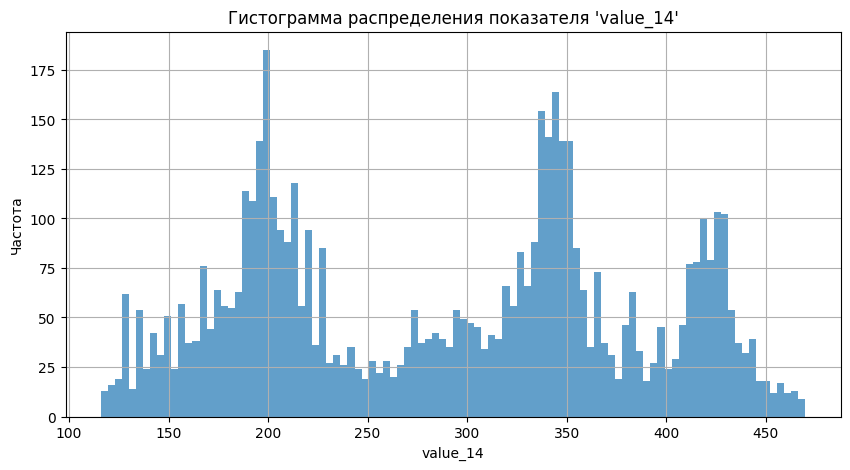

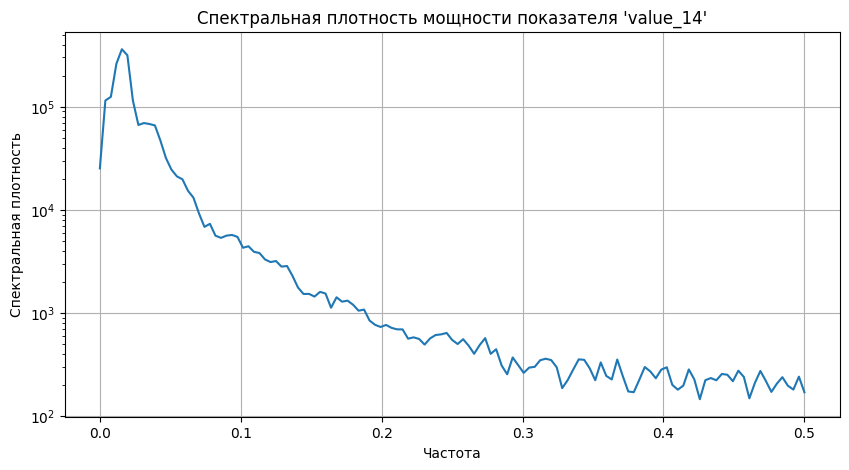

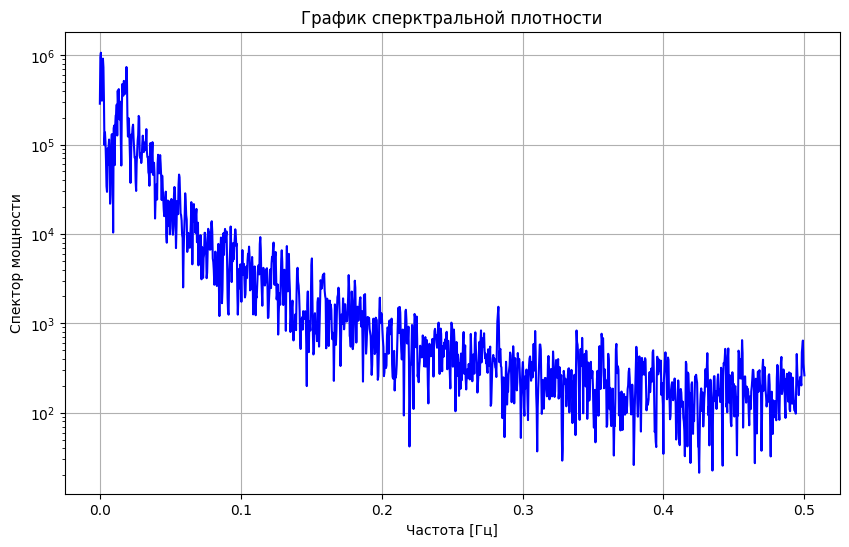

Максимальный лаг: 74


<Figure size 1000x600 with 0 Axes>

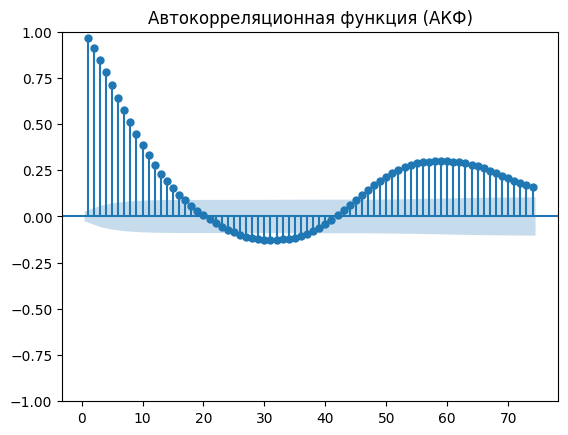

<Figure size 1000x600 with 0 Axes>

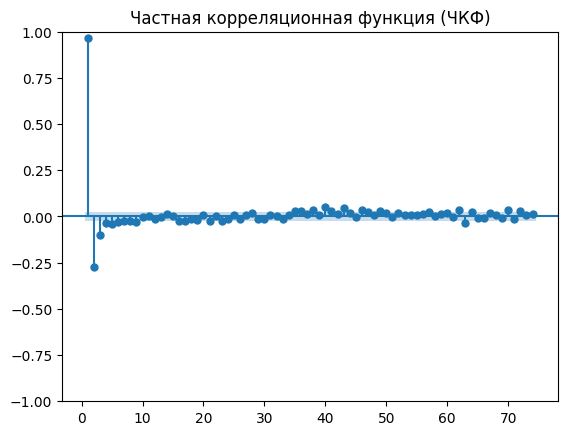

In [ ]:
start_datetime = '2024-10-14 00:00'
end_datetime = '2024-10-18 23:59'

value = 'value_14'

df_filter = df[(df['mode'] == 1)]
df_filter.to_csv('statistics_14-10-2024_18-10-2024.csv', index=False)

stat_consolidated(df, value, start_datetime, end_datetime)